## Statistiques descriptives

### Description univariée

In [51]:
import random
import math
import numpy as np

    1.3) Types de variables

- Code postal de la résidence : 
                    Variable qualitative ordinale ou nominale
- Taille en cm : 
                    Variable quantitative discret
- Série du BAC : 
                    Variable qualitative nominale
- Moyenne au S1 : 
                    Variable quantitative continue
- Satisfaction à propos de la formation : 
                    Variable qualitative ordinal

    2) Préparation des données

In [52]:
def where_none(dat:list):
    indices=[]
    for i in range(len(dat)):
        if dat[i]==None:
            indices.append(i)
    return indices

def remove_data(dat:list, pos:list):
    res=[]
    for i in range(len(dat)):
        if i not in pos:
            res.append(dat[i])
    return res

def replace_value(dat:list, value:list, repvalue:list):
    newDat=dat.copy()
    for i in range(len(value)):
        old=value[i]
        new=repvalue[i]
        for j in range(len(newDat)):
            if newDat[j]==old:
                newDat[j]=new
    return newDat

In [53]:
data1 = [11,5,6,7,5,2,3,6,None,1,2,5,4,9,6,3,5,8,None]
data2 = ["toto","toto","tata","toto","titi","toto","tata","tata"]
data3 = [None, "None"]

print("Test1 : ",[8, 18]==where_none(data1))
print("Test2 : ",[]==where_none(data2))
print("Test3 : ",[0]==where_none(data3))
print("Test4 : ",[11, 5, 6, 7, 5, 2, 3, 6, 1, 2, 5, 4, 9, 6, 3, 5, 8]==remove_data(data1,where_none(data1)))
print("Test5 : ",[11, 5, 6, 7, 5, 2, 3, 6, None, 1, 2, 5, 4, 9, 6, 3, 5, 8, None]==data1)
print("Test6 : ",[-11, 5, 6, 7, 5, 2, 3, 6, 0, 1, 2, 5, 4, 9, 6, 3, 5, -8, 0]==replace_value(data1,[8,11,None],[-8,-11,0]))

Test1 :  True
Test2 :  True
Test3 :  True
Test4 :  True
Test5 :  True
Test6 :  True


#### Discrétisation

In [54]:
def cut(dat:list, split:list):
    res=dat.copy()
    for i in range(len(res)):
        j=0
        while j<len(split) and res[i]>split[j]:
            j+=1
        ess=res[i]
        if j>=len(split):
            res[i]=f'({split[j-1]},inf)'
        elif ess<split[0]:
            res[i]=f'(inf,{split[0]}]'
        else:
            res[i]=f'({split[j-1]},{split[j]}]'
        if split[0]<=ess<=split[1]:
            res[i]=f'[{split[0]},{split[1]}]'
    return res
print('Test cut 1 :',['(inf,0]', '[0,1]', '(4,5]', '(5,inf)']==cut([-10,0,5,10],[0,1,2,3,4,5]))

Test cut 1 : True


In [55]:
data = [5.68, 10.82, 8.84, 19.81, 10.91, 13.68, 7.45, 11.36, 2.28, 16.76]
print(data)
print('Test cut 2 : ',cut(dat=data,split=[0,5,10,15,20])==['(5,10]','(10,15]','(5,10]','(15,20]',
         '(10,15]','(10,15]','(5,10]','(10,15]','[0,5]','(15,20]'])

[5.68, 10.82, 8.84, 19.81, 10.91, 13.68, 7.45, 11.36, 2.28, 16.76]
Test cut 2 :  True


    3) Statistiques univariées

        3.1) Distribution groupée

In [56]:
def get_gdistr(dat:list):
    modalites=[]
    for elt in dat:
        if elt not in modalites:
            modalites.append(elt)
    res={}
    for modal in modalites:
        effectif=0
        for elt in dat:
            if elt==modal:
                effectif+=1
        res[modal]=(effectif,effectif/len(dat))
    return res

In [57]:
# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

# Construction de la ditribution groupée
gd_data = get_gdistr(data)

# Affichage
print('Test get_gdistr : ',{'tata': (6, 0.3), 'titi': (3, 0.15), 'toto': (11, 0.55)}==gd_data)

Test get_gdistr :  True


In [58]:
# Fonction pour un plus chouette affichage
def pprint_gd(gd):
    mod_max_size  = max([len(str(m)) for m in gd.keys()]+[len("Modalité")])
    eff_max_size  = max([len(str(gd[m][0])) for m in gd.keys()]+[len("Effectif")])
    freq_max_size = max([len(str(gd[m][1])) for m in gd.keys()]+[len("Fréquence")])
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    print("Modalité".ljust(mod_max_size+3,' ')+"Effectif".rjust(eff_max_size+3,' ')+"Fréquence".rjust(freq_max_size+3,' '))
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    for k in gd.keys():
        print(str(k).ljust(mod_max_size+3,' ')+str(gd[k][0]).rjust(eff_max_size+3,' ')+str(gd[k][1]).rjust(freq_max_size+3,' '))
    return None

In [59]:
pprint_gd(gd_data)

----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
toto                11        0.55
tata                 6         0.3
titi                 3        0.15


In [60]:
# Générons des données aléatoires (des float arrondis à 10^-2 entre 0 et 20)
data = [round(random.random()*20,2) for _ in range(10)]
print("Données initiales : ",data,"\n")
data2 = cut(dat=data, split=[0,5,10,15,20])
print("Données dicrétisées : ",data2,"\n")
print("Tableau de la distribution groupée :")
pprint_gd(get_gdistr(data2))

Données initiales :  [10.71, 6.36, 19.17, 0.56, 18.69, 19.27, 5.02, 14.62, 12.34, 11.39] 

Données dicrétisées :  ['(10,15]', '(5,10]', '(15,20]', '[0,5]', '(15,20]', '(15,20]', '(5,10]', '(10,15]', '(10,15]', '(10,15]'] 

Tableau de la distribution groupée :
----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
(10,15]              4         0.4
(5,10]               2         0.2
(15,20]              3         0.3
[0,5]                1         0.1


        3.2) Distribution d’une variable quantitative

In [61]:
def mean(dat):
    somme=0
    nbVal=0
    for elt in dat:
        somme+=elt
        nbVal+=1
    return somme/nbVal

def quantile(dat,p):
    dat=dat.copy()
    dat=sorted(dat)
    N=len(dat)
    j=int(N*p)
    if j==N*p:
        quantile=(dat[j-1]+dat[j])/2
    else:
        quantile=dat[int(j)]
    return quantile

def median(dat):
    return quantile(dat,0.5)

def stdev(dat):
    listeEcarts=[]
    moyenne=mean(dat)
    for elt in dat:
        listeEcarts.append(pow(elt-moyenne,2))
    return sqrt(mean(listeEcarts))

def cofvar(dat):
    return stdev(dat)/mean(dat)*100

def valrange(dat):
    return max(dat)-min(dat)

def iquarange(dat):
    return quantile(dat,0.75)-quantile(dat,0.25)

In [62]:
from math import sqrt
# Génération de données aléatoires
import random
data = [round(random.random()*20,2) for _ in range(20)]

# Affichage des inficateurs
print(sorted(data))
print("Moyenne         : ",round(mean(data),2))
print("Médiane         : ",round(median(data),2))
print("Écart-type      : ",round(stdev(data),2))
print("Coef. de var.   : ",round(cofvar(data),2))
print("Étendue         : ",round(valrange(data),2))
print("Éc. interquart. : ",round(iquarange(data),2))
print("Prem.  quartile : ",round(quantile(data,0.25),2))
print("Trois. quartile : ",round(quantile(data,0.75),2))

[0.02, 0.11, 0.35, 2.87, 6.56, 9.35, 9.81, 9.95, 11.44, 11.48, 11.79, 11.97, 12.45, 13.13, 13.48, 13.55, 13.99, 14.48, 17.1, 18.93]
Moyenne         :  10.14
Médiane         :  11.63
Écart-type      :  5.34
Coef. de var.   :  52.7
Étendue         :  18.91
Éc. interquart. :  5.56
Prem.  quartile :  7.96
Trois. quartile :  13.52


    3.3 Représentations graphiques

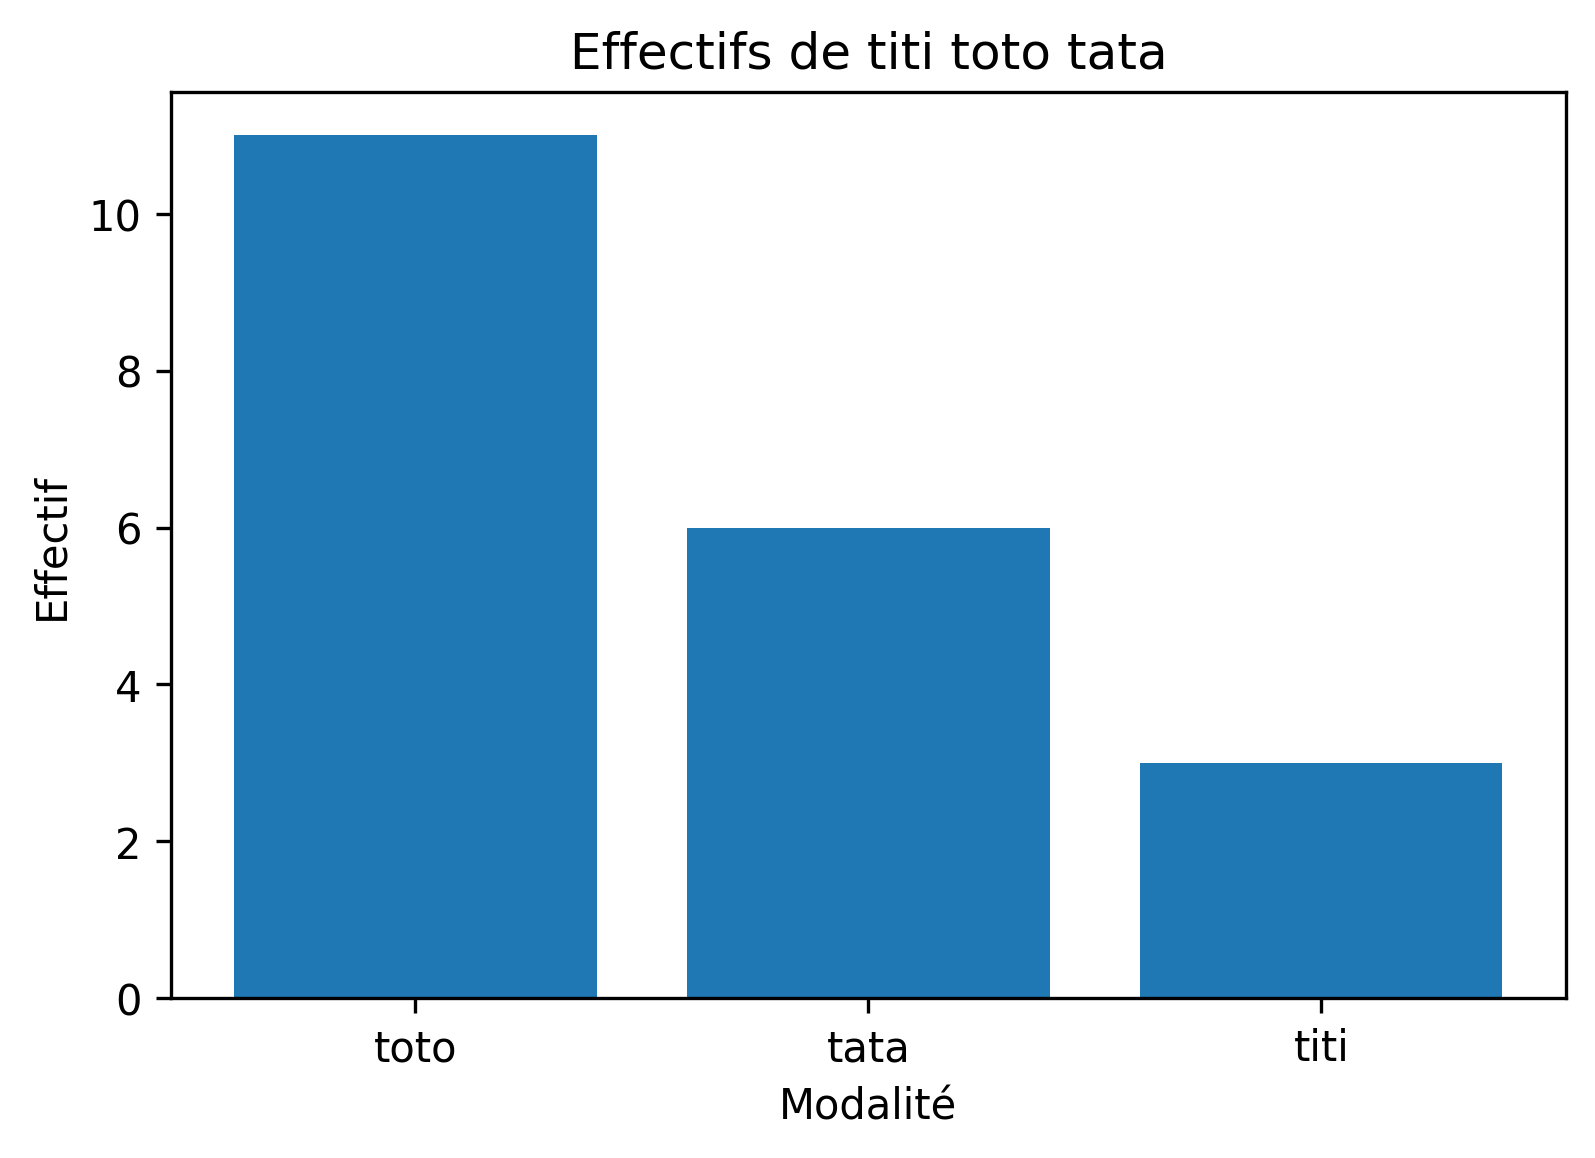

In [63]:
import matplotlib.pyplot as plt
# Si vous voulez augmenter la qualité des images produites :
plt.rcParams['figure.dpi']= 300

# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

# Extraction de la distribution groupée
data_gd = get_gdistr(data)
# On récupère les modalités
classes = list(data_gd.keys())
# On récupère les effectifs pour s'en servir comme hauteurs des barres
heights = [data_gd[c][0] for c in classes]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Effectifs de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
# Affichage
plt.show()

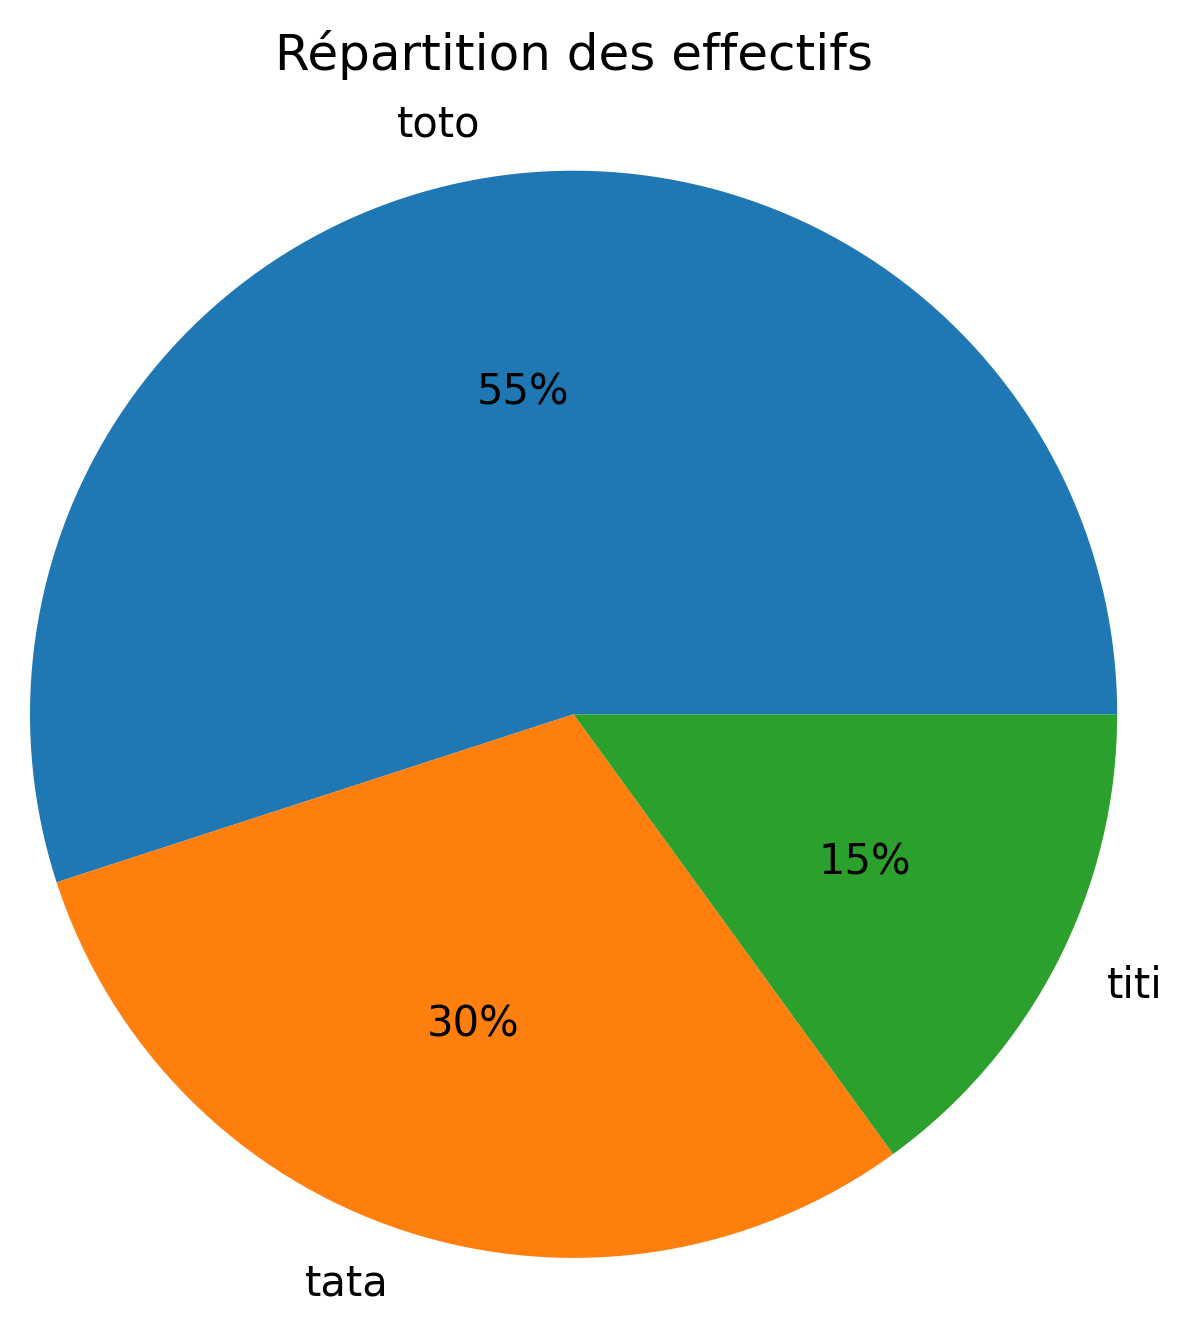

In [64]:
# On récupère les fréquences dans le tableau de la distribution groupé
props = [data_gd[c][1] for c in classes]
# PRoduction du graphique
plt.figure()
plt.title('Répartition des effectifs\n\n\n')
plt.pie(props, labels=classes,
        autopct='%.0f%%',
        radius=1.5)
# Affichage
plt.show()

In [65]:
# Génération de 59 notes aléatoires entre 0 et 20
data = [round(random.random()*20,2) for _ in range(50)]
print(data)

[5.85, 1.41, 19.4, 8.88, 3.91, 12.22, 11.43, 16.26, 16.59, 16.05, 13.62, 15.51, 11.27, 6.43, 13.12, 9.45, 7.28, 10.04, 3.31, 17.25, 5.17, 7.9, 18.65, 13.08, 7.77, 4.29, 17.03, 10.46, 6.86, 9.48, 17.83, 7.98, 11.36, 9.39, 2.65, 11.7, 17.69, 0.07, 2.34, 7.17, 14.5, 7.83, 7.25, 12.31, 0.76, 18.15, 12.86, 14.49, 16.55, 1.22]


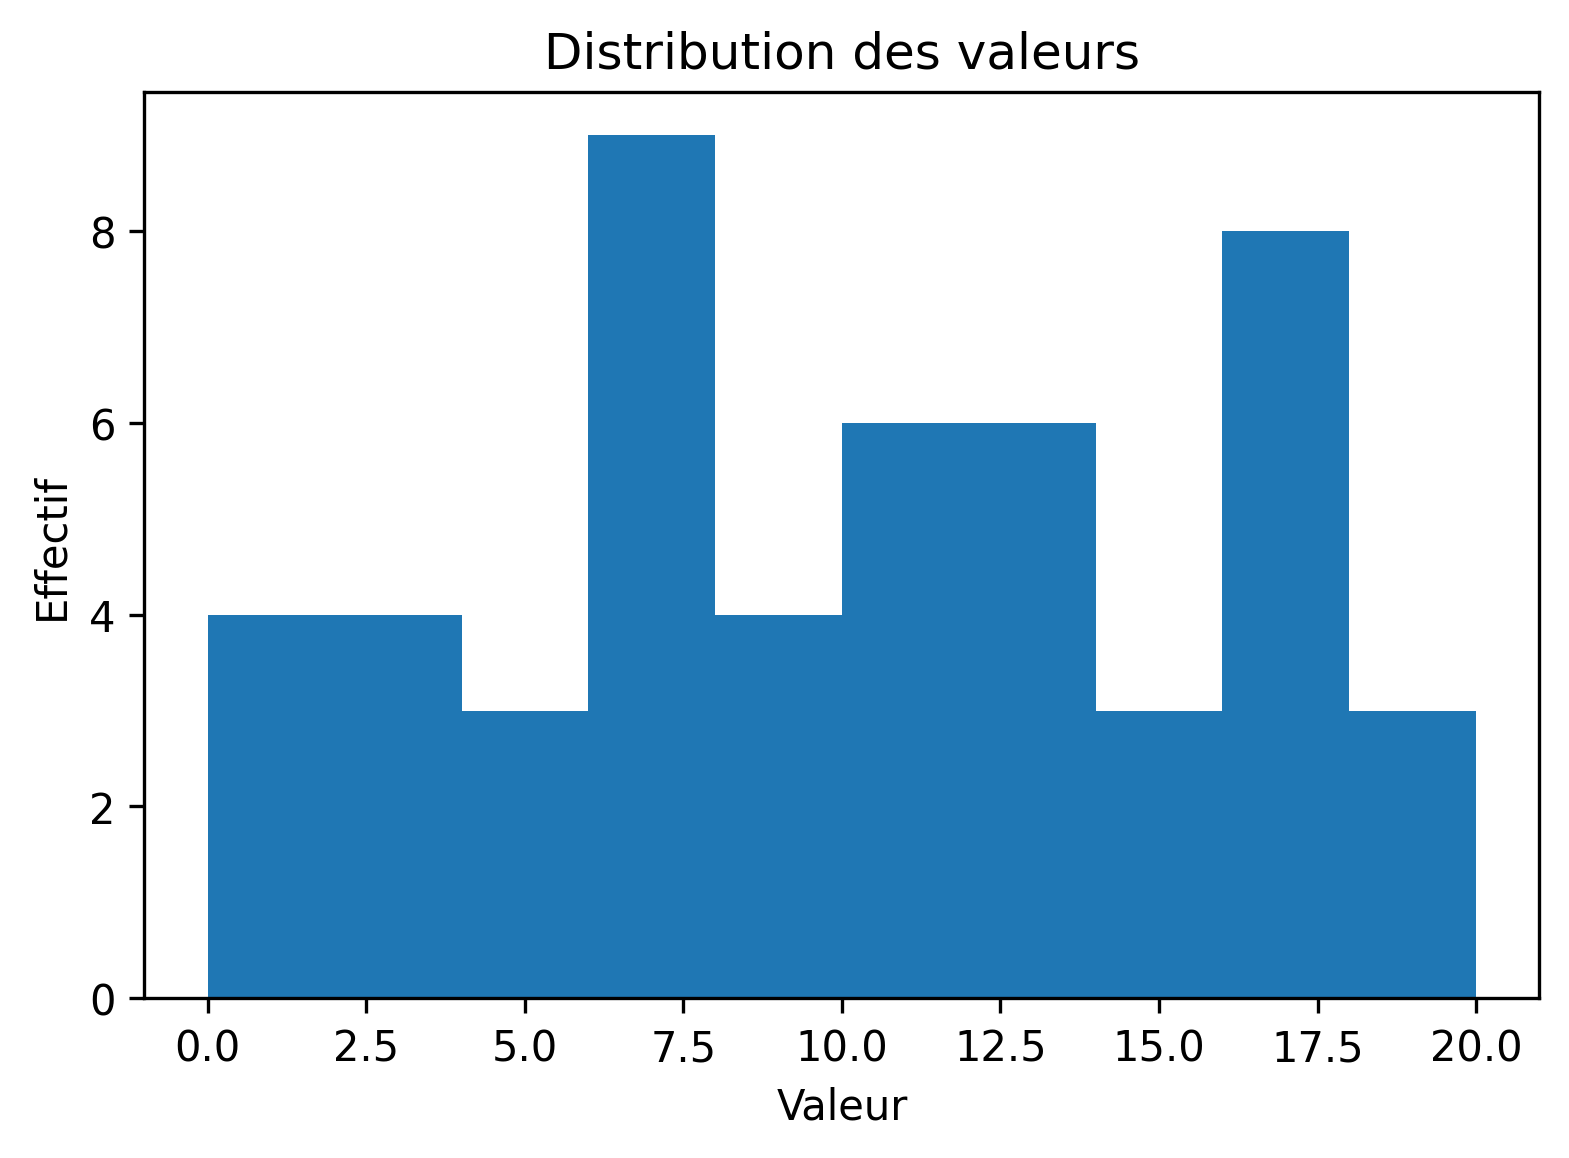

In [66]:
# Production de l'histogramme 
# Ke second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la pkace, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, [0,2,4,6,8,10,12,14,16,18,20])
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

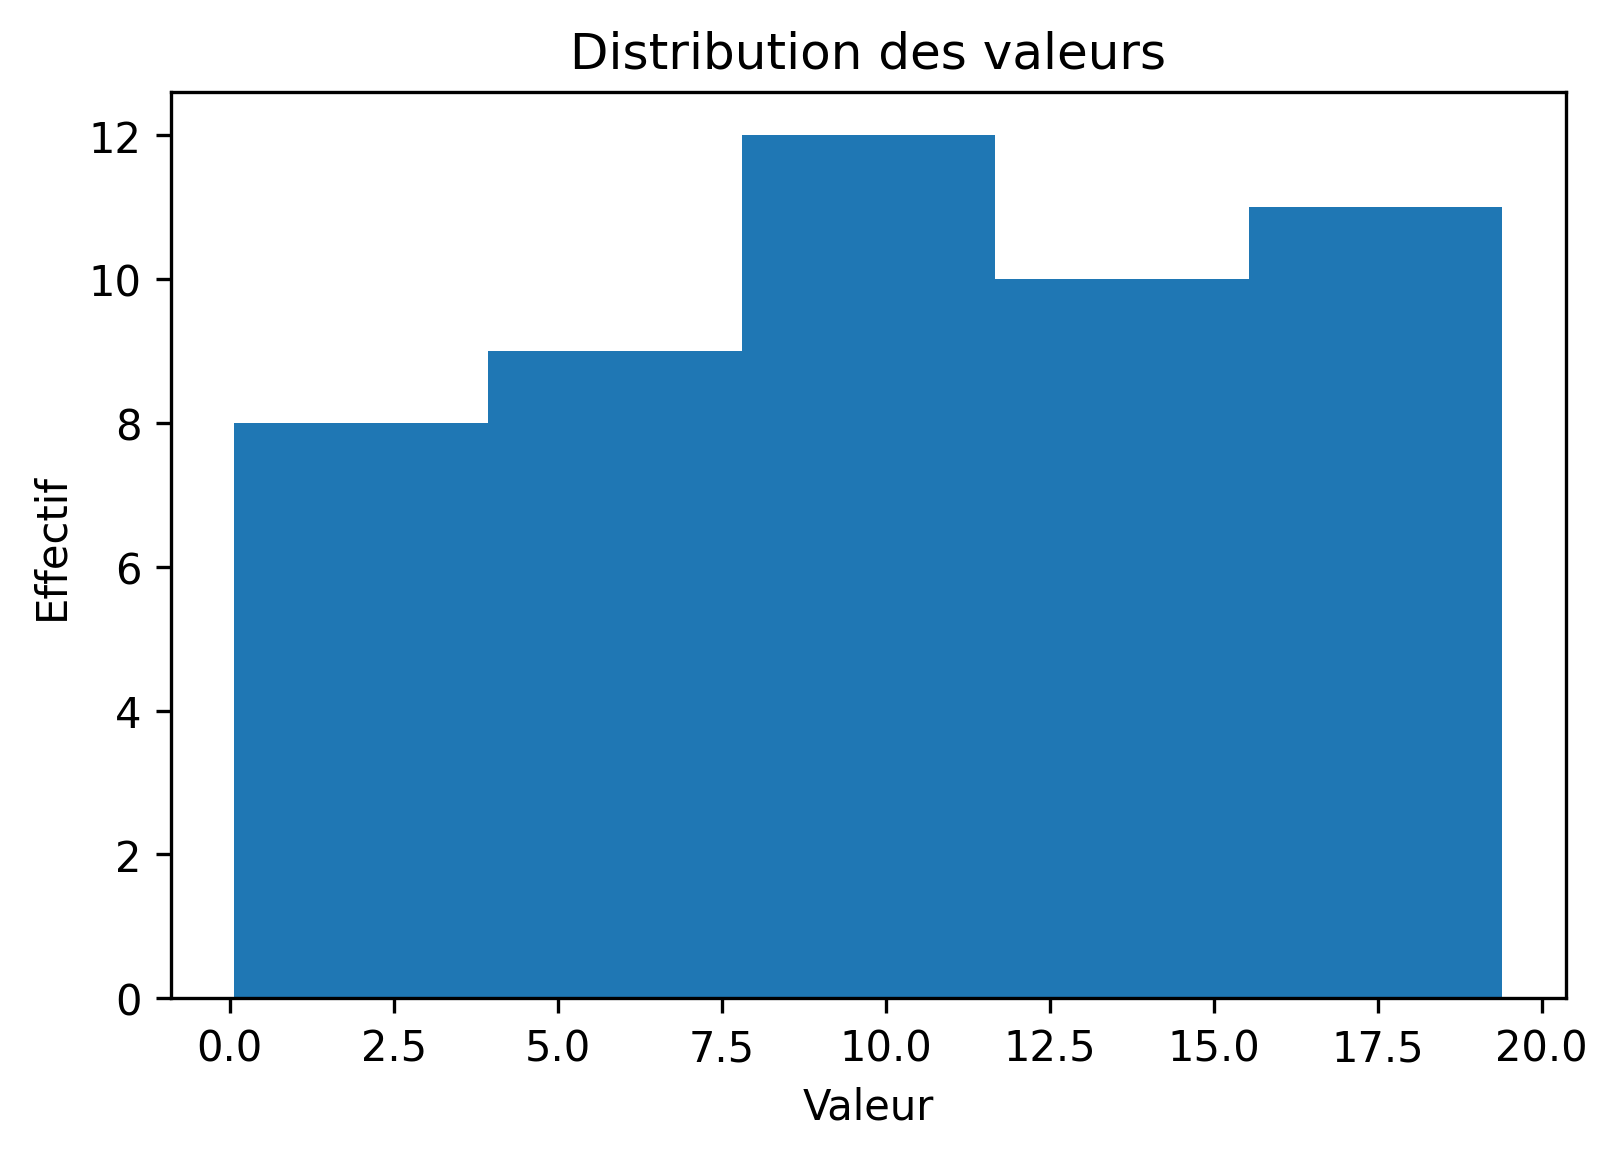

In [67]:
# Production de l'histogramme 
# Ke second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la pkace, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, 5)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

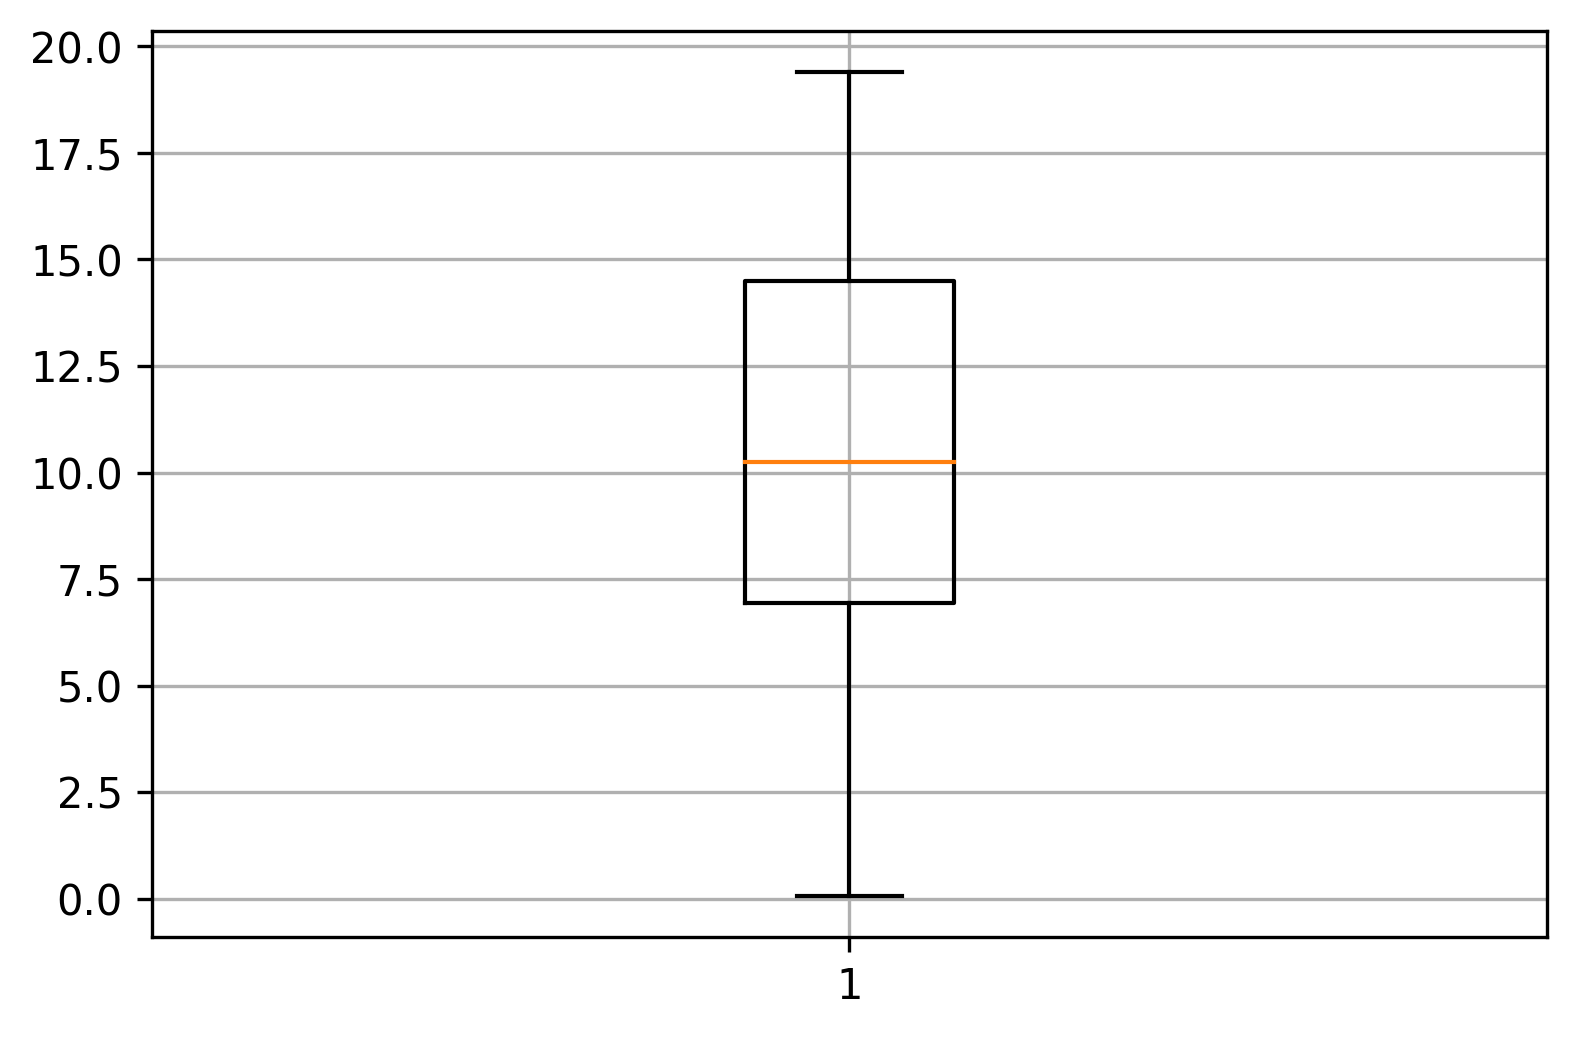

In [68]:
# Production du boxplot
fig = plt.figure()
plt.boxplot(data)
plt.grid()
# Affichage
plt.show()

4) Problèmes et mise en pratique

    4.1 Représentations graphiques

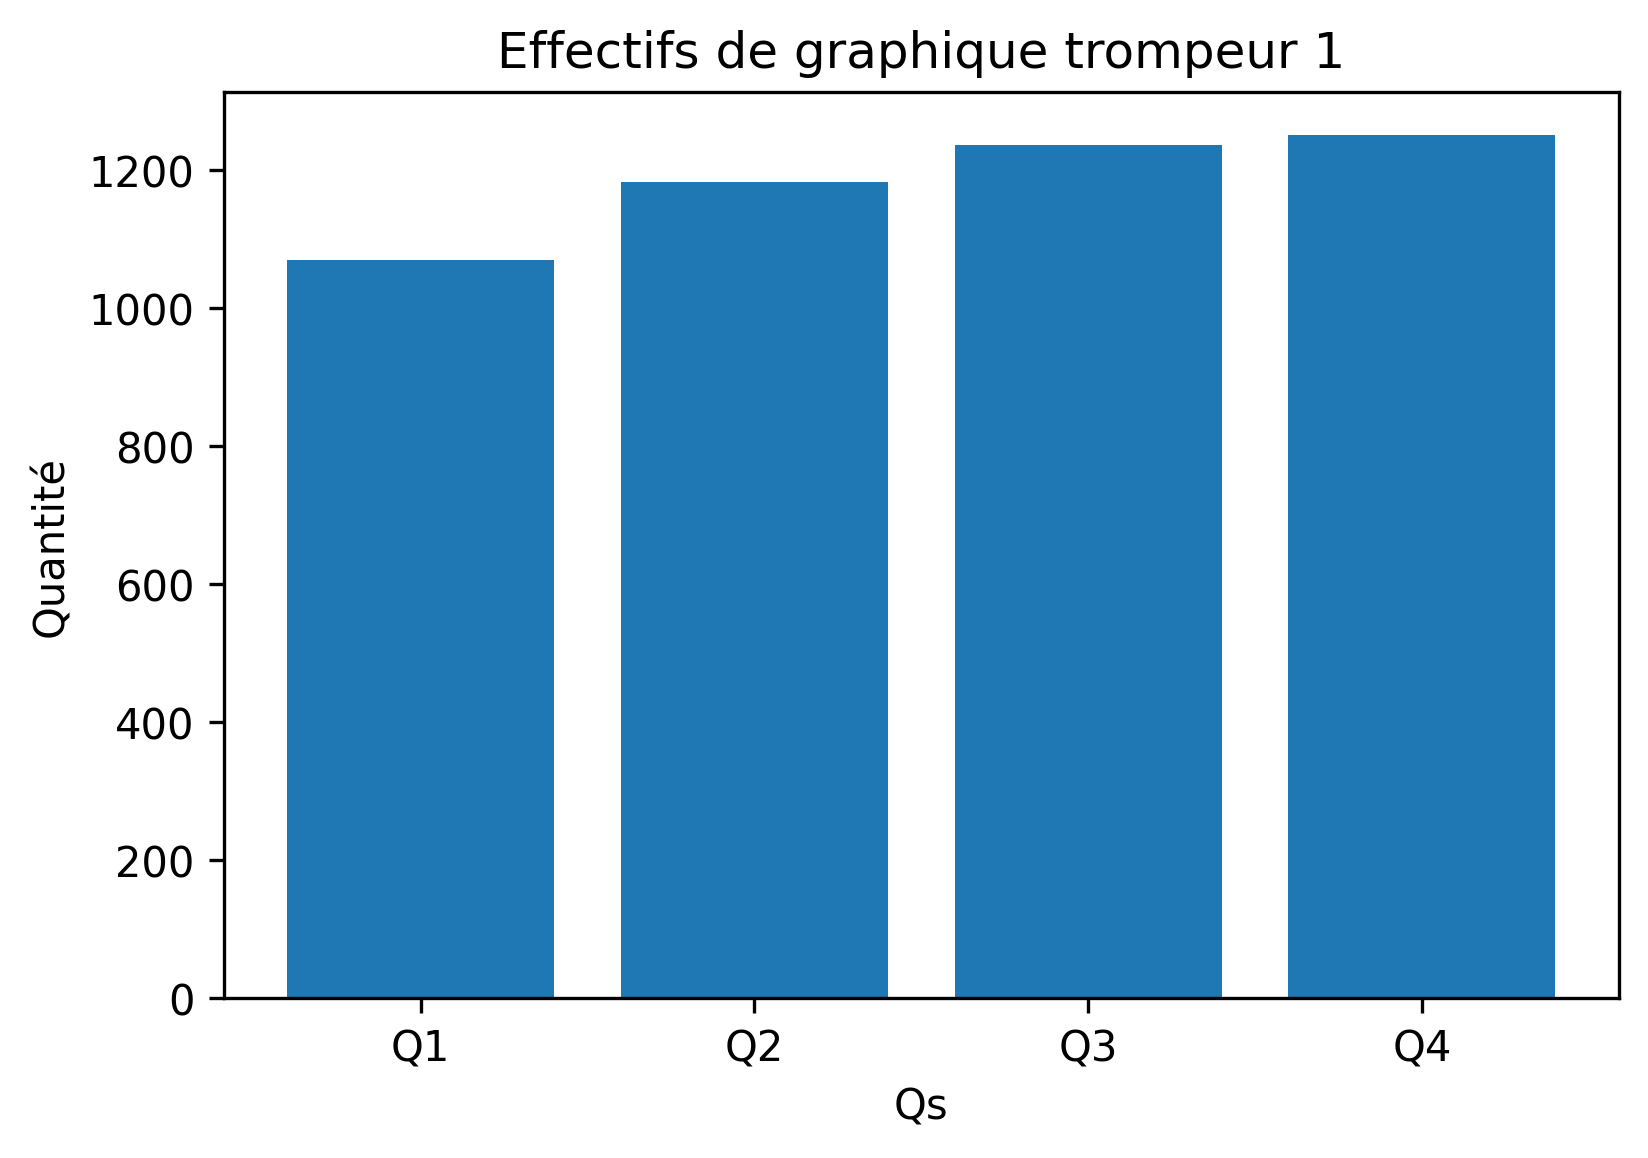

In [69]:
classes = ["Q1","Q2","Q3","Q4"]
# On récupère les effectifs pour s'en servir comme hauteurs des barres
heights = [1070,1182,1236,1250]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Effectifs de graphique trompeur 1")
plt.xlabel("Qs")
plt.ylabel("Quantité")
# Affichage
plt.show()

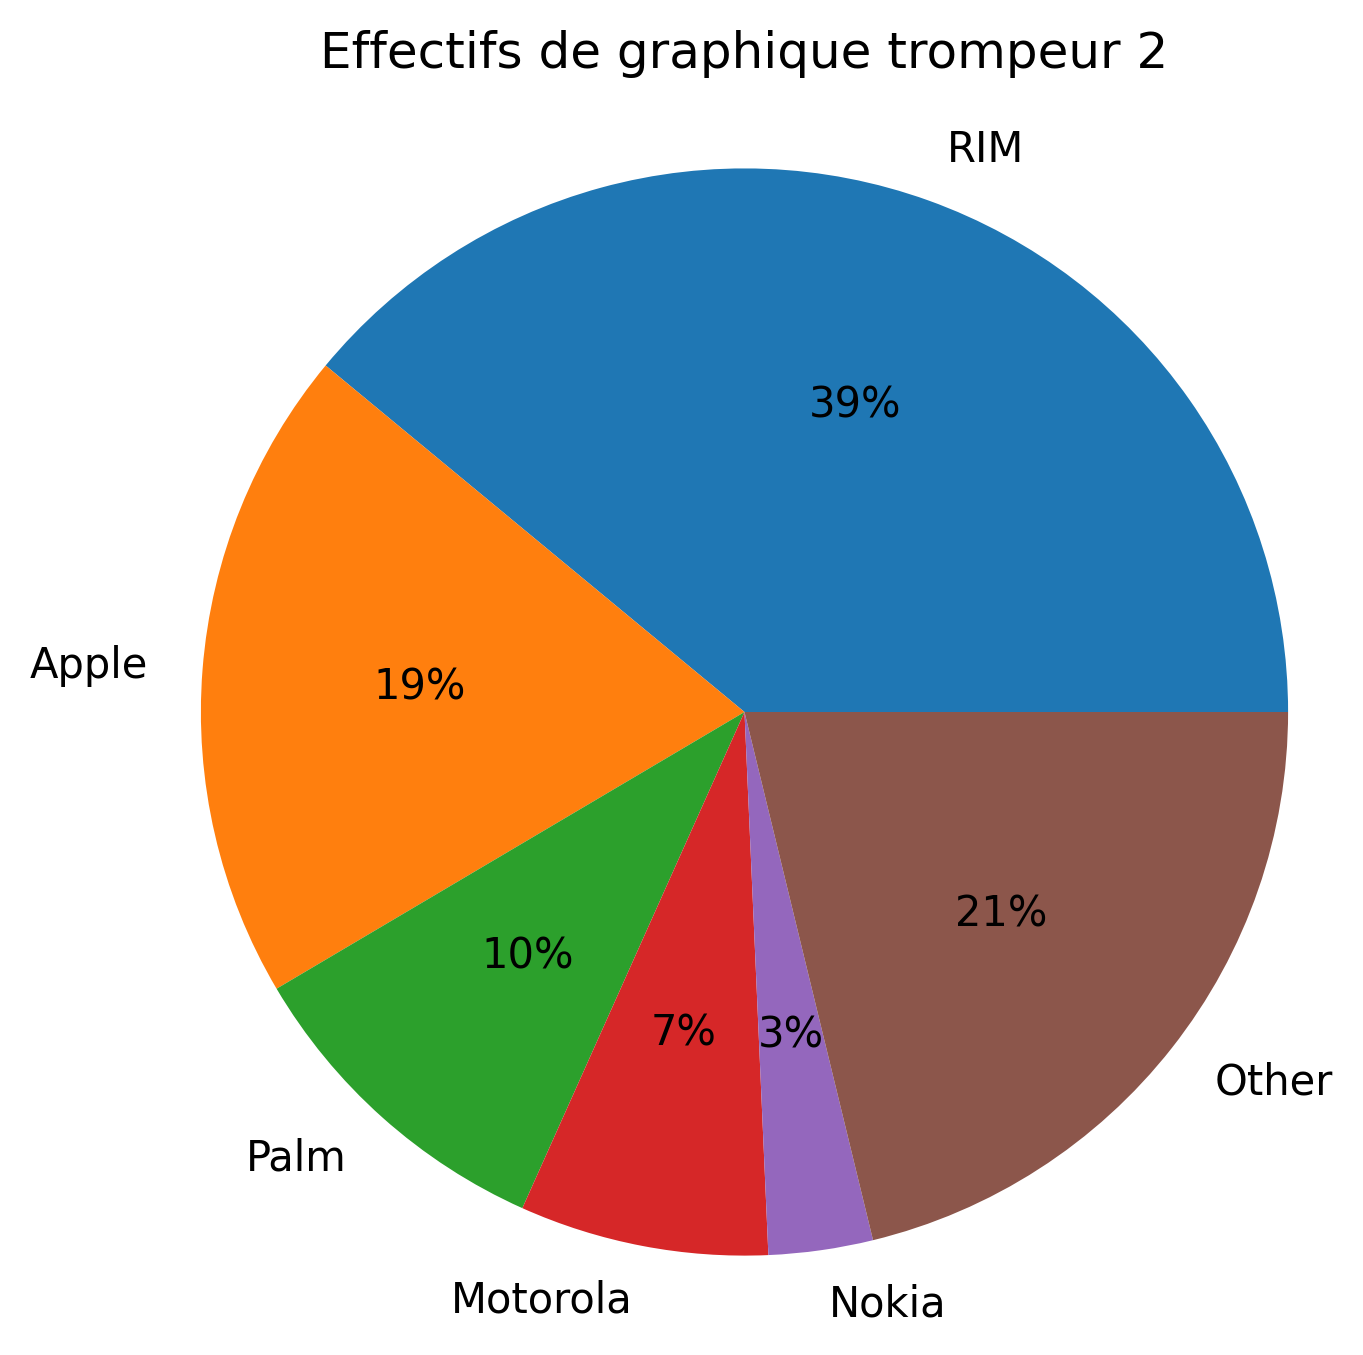

In [70]:
# On récupère les fréquences dans le tableau de la distribution groupé
props = [39,19.5,9.8,7.4,3.1,21.2]
# PRoduction du graphique
plt.figure()
plt.title('Effectifs de graphique trompeur 2\n\n\n')
plt.pie(props, labels=["RIM","Apple","Palm","Motorola","Nokia","Other"],
        autopct='%.0f%%',
        radius=1.5)
# Affichage
plt.show()

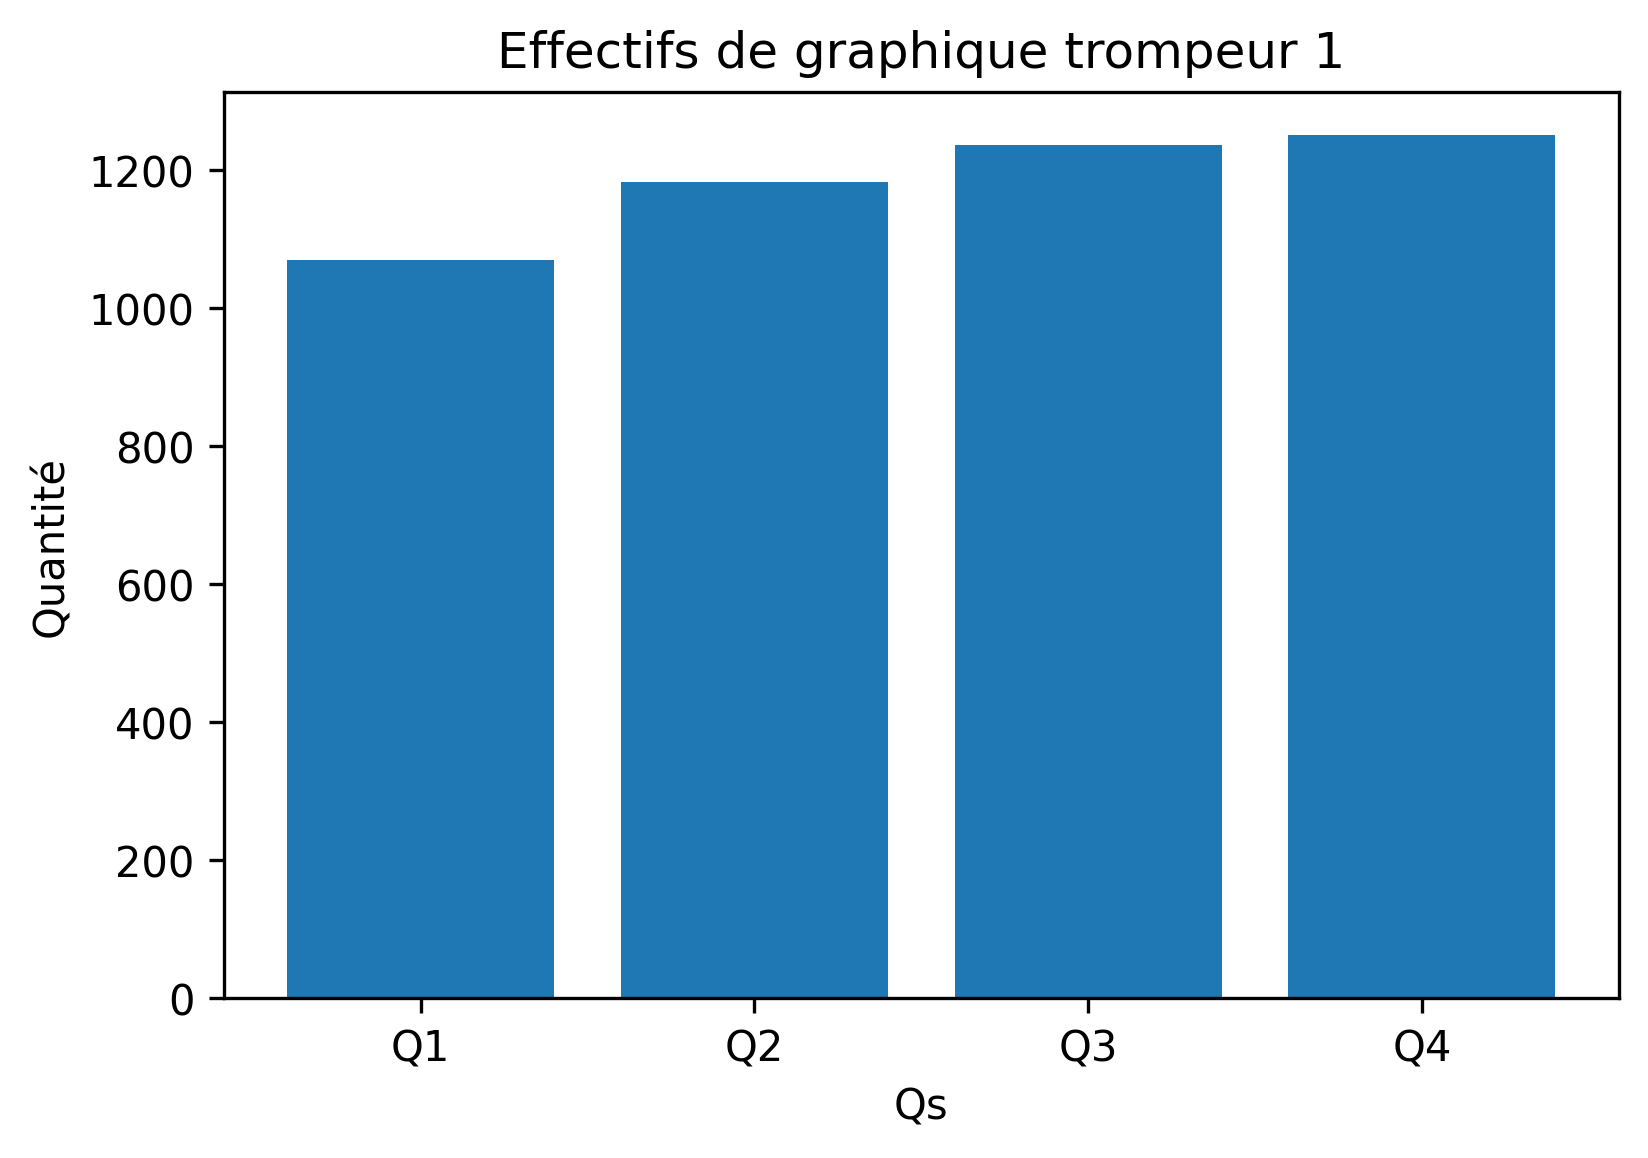

In [71]:
classes = ["Q1","Q2","Q3","Q4"]
# On récupère les effectifs pour s'en servir comme hauteurs des barres
heights = [1070,1182,1236,1250]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Effectifs de graphique trompeur 1")
plt.xlabel("Qs")
plt.ylabel("Quantité")
# Affichage
plt.show()

    4.2 Le problème des données groupées

In [72]:
# Dictionnaire contenant les données groupées
# clé : (a,b) ---> intervalle de note ]a,b] (sauf pour le premier où le 0 est inclus)
# valeur : n  ---> nombre de notes comprises dans l'intervalle
data = [2.8, 2.9, 2.9, 3.1, 3.2, 3.4, 3.4, 3.5, 3.6, 3.8, 4.0, 4.0, 4.1, 4.3, 
        4.5, 4.7, 4.8, 4.8, 7.9, 8.2, 8.6, 8.7, 9.3, 9.4, 9.6, 12.8, 13.0, 
        13.1, 13.2, 13.2, 13.4, 13.7, 13.8, 13.9, 14.1, 14.1, 14.2, 14.7, 17.8, 
        18.1, 18.9, 19.0, 19.1, 19.1, 19.3, 19.6, 19.7, 19.9]
newData=get_gdistr(cut(data,split=[0,5,10,15,20]))
newDatas={}
for key,elt in newData.items():
    (val,noth)=elt
    key=list(key)
    L=[',','(','[',')',']']
    i=0
    for i in range(len(L)):
        while L[i] in key:
            key.remove(L[i])
    if len(key)==3:
        key=[key[0],key[1]+key[2]]
    if len(key)==4:
        key=[key[0]+key[1],key[2]+key[3]]
    key[0]=int(key[0])
    key[1]=int(key[1])
    key=tuple(key)
        
    newDatas[key]=val 
print("Data correcte? :",newDatas == {(0,5):  18, 
        (5,10):  7, 
        (10,15):13, 
        (15,20):10})

Data correcte? : True


4.3 Problèmes liés à la moyenne et à la médiane

In [73]:
salaires_A = [1243, 1278, 120124, 1394, 1296, 1289, 1303, 1083, 1291, 1337,
              1075, 1361, 1259, 1138, 1188, 1217, 1164, 1535, 1283, 1275, 
              1146, 1196, 1237, 1191, 1389, 1210, 1067, 1094, 1249, 1239, 
              1262, 1294, 1360, 1276, 1208, 1234, 1091, 1306, 1089, 1148, 
              1185, 1192, 1186, 1075, 1057, 1221, 1291, 1421, 120099, 1348, 
              1089, 1171, 1290, 1071, 1235, 1202, 1304, 120118, 1396, 1293, 
              1280, 1225, 1237, 1297, 1242, 120029, 1179, 1115, 1105, 1146, 
              120044, 1296, 1268, 1288, 1102, 1123, 1308, 1244, 1099, 1147, 
              1098, 1406, 1275, 1206, 1377, 1243, 1152, 1138, 1205, 1132, 
              1221, 1370, 1328, 1138, 1279, 1081, 1109, 1316, 1291, 1213, 
              1159, 119901, 1148, 1090, 1288, 1234, 1241, 120016, 1326, 
              1165, 119917, 1148, 119949, 1133, 1019, 1212, 119925, 1281, 
              1367, 1102, 1241, 1188, 1281, 1389, 1092, 1163, 1227, 1191, 
              1228, 1056, 1106, 1151, 1162, 1229, 1334, 1243, 119959, 1208, 
              1177, 1217, 1133, 1364, 1147, 119931, 1149, 1211, 1181, 1213, 
              1389, 1199, 1249, 1291, 1137, 1055, 1211, 1307, 1141, 1098, 
              1048, 1238, 1071, 1277, 120116, 120047]
salaires_B = [119965, 1217, 1124, 1379, 1129, 120063, 119930, 1104, 120120, 1348, 120128, 
            1226, 1173, 120024, 120032, 119862, 120056, 1305, 119902, 120098, 1166, 1180, 
            1061, 119816, 119929, 1226, 119944, 119847, 120094, 1089, 1298, 1103, 1205, 
            119782, 119904, 119875, 119954, 120162, 1322, 120031, 1100, 1123, 990, 120020, 
            119851, 120098, 1121, 120070, 1372, 1299, 119926, 1192, 119870, 120020, 1293, 
            120003, 1242, 1343, 119999, 1063, 120056, 1306, 1230, 119825, 1308, 1289, 1172, 
            1122, 120096, 120014, 1358, 1248, 120010, 1137, 1184, 120202, 1088, 119818, 
            120066, 1103, 1109, 1259, 1323, 119762, 1113, 1152, 119969, 119783, 119934, 
            1220, 119896, 120023, 119893, 120191, 1219, 120027, 119874, 120152, 1337]

In [74]:
print("Salaire moyen pays A : ",mean(salaires_A))
print("Salaire median pays A : ",median(salaires_A))
print("Salaire moyen pays B : ",mean(salaires_B))
print("Salaire median pays B : ",median(salaires_B))

Salaire moyen pays A :  11357.810975609756
Salaire median pays A :  1228.5
Salaire moyen pays B :  61192.28282828283
Salaire median pays B :  119762


In [75]:
# Fonction utilisée pour la transformation logarithmique : 5.1 mais utile ci-après
def transf_log(data:list)->list:
    new_data=[]
    for elt in data:
        new_data.append(np.log(elt))
    return new_data
        


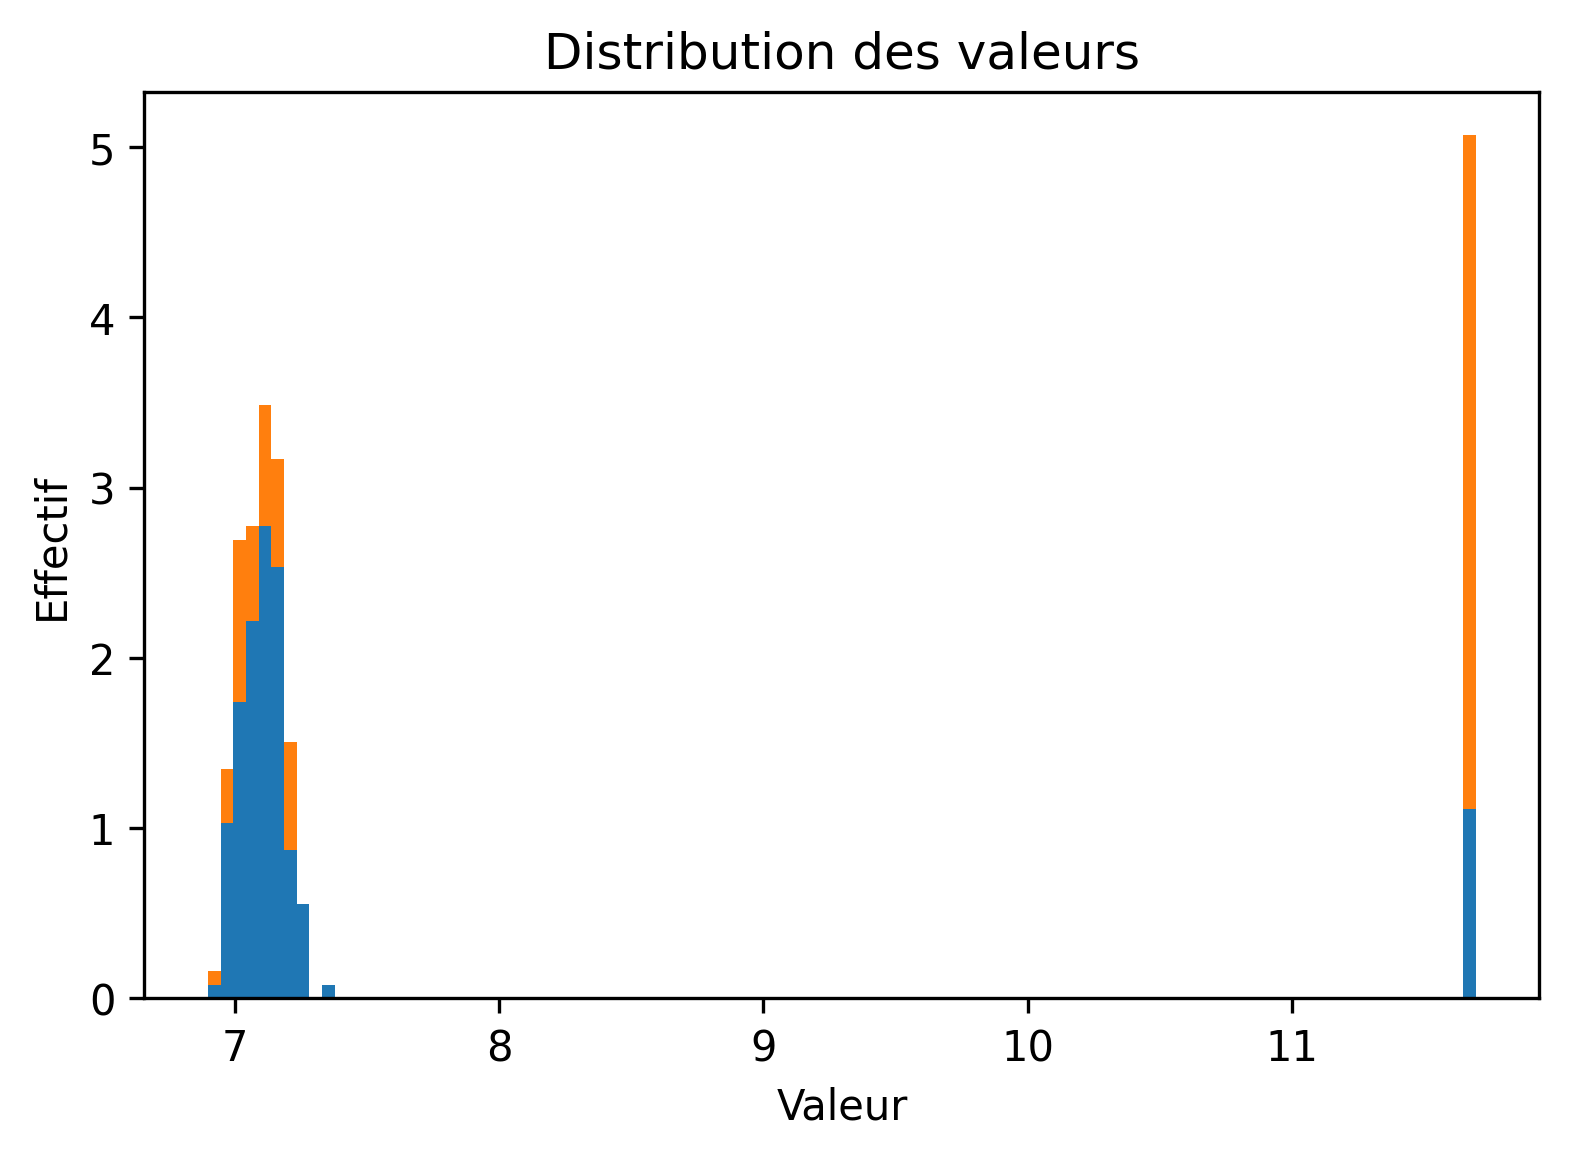

Les valeurs sont les logarithmes néperiens des salaires pour plus de clarté


In [78]:
plt.figure()
plt.hist(([transf_log(salaires_A),transf_log(salaires_B)]), 100,density=True, histtype='bar', stacked=True)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()
print("Les valeurs sont les logarithmes néperiens des salaires pour plus de clarté")

5. Transformation d’une variable

    5.1 Transformation logarithmique

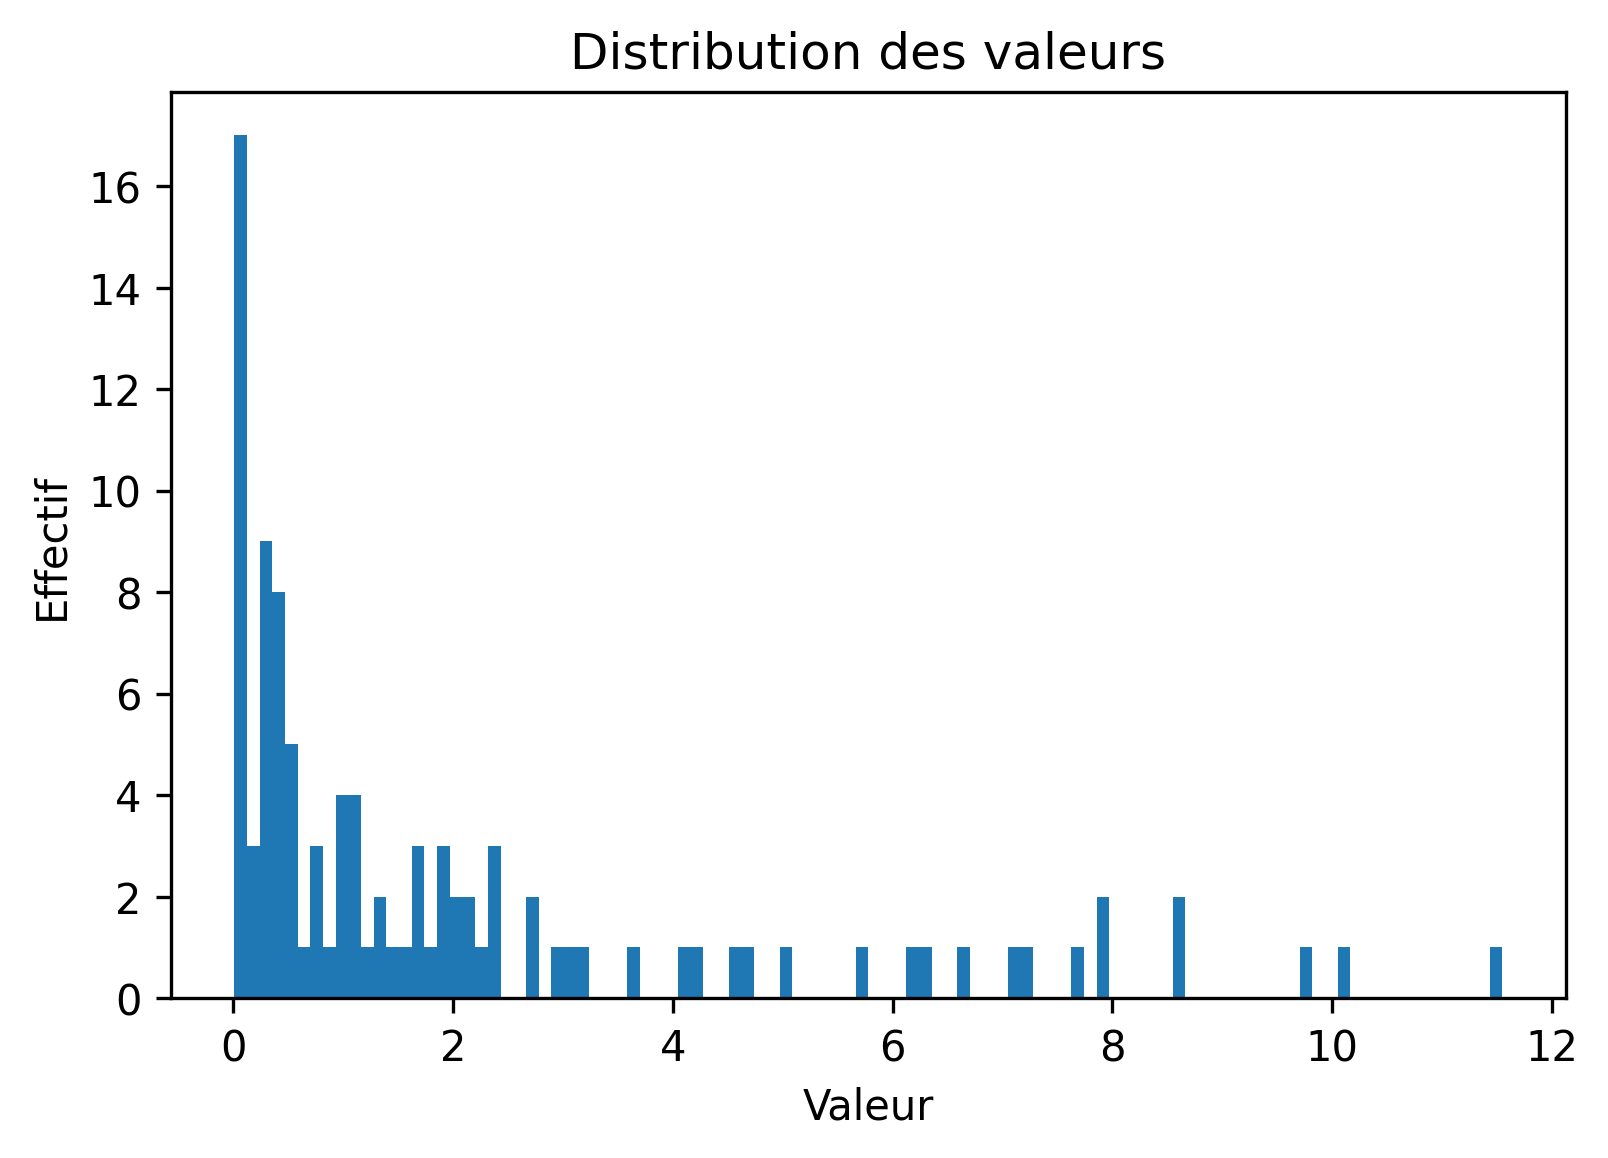

In [80]:
data = [1.65, 3.67, 1.96, 0.77, 0.45, 2.25, 0.47, 7.93, 0.77, 1.01,
        0.53, 0.31, 0.25, 0.55, 0.14, 0.27, 4.05, 3.11, 0.27, 1.27, 
        2.33, 9.81, 1.07, 0.02, 0.55, 1.93, 0.09, 2.35, 6.16, 0.05, 
        0.02, 7.17, 11.55, 3.21, 1.36, 7.97, 0.3, 1.82, 2.0, 0.02, 
        2.12, 1.02, 0.49, 0.17, 0.03, 2.36, 0.08, 0.51, 0.09, 0.94, 
        2.71, 0.29, 8.55, 0.47, 10.14, 1.04, 2.01, 0.39, 1.07, 1.64, 
        4.23, 2.11, 0.08, 0.1, 0.01, 1.5, 7.66, 0.07, 0.37, 2.75, 
        1.64, 0.84, 0.01, 0.3, 2.97, 6.28, 0.29, 0.02, 0.03, 4.68, 
        0.61, 5.73, 1.08, 5.03, 8.55, 1.52, 4.55, 0.47, 0.28, 0.39, 
        1.16, 1.3, 0.08, 1.96, 0.76, 0.21, 0.43, 6.64, 7.05, 0.01]
plt.figure()
plt.hist(data, 100)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

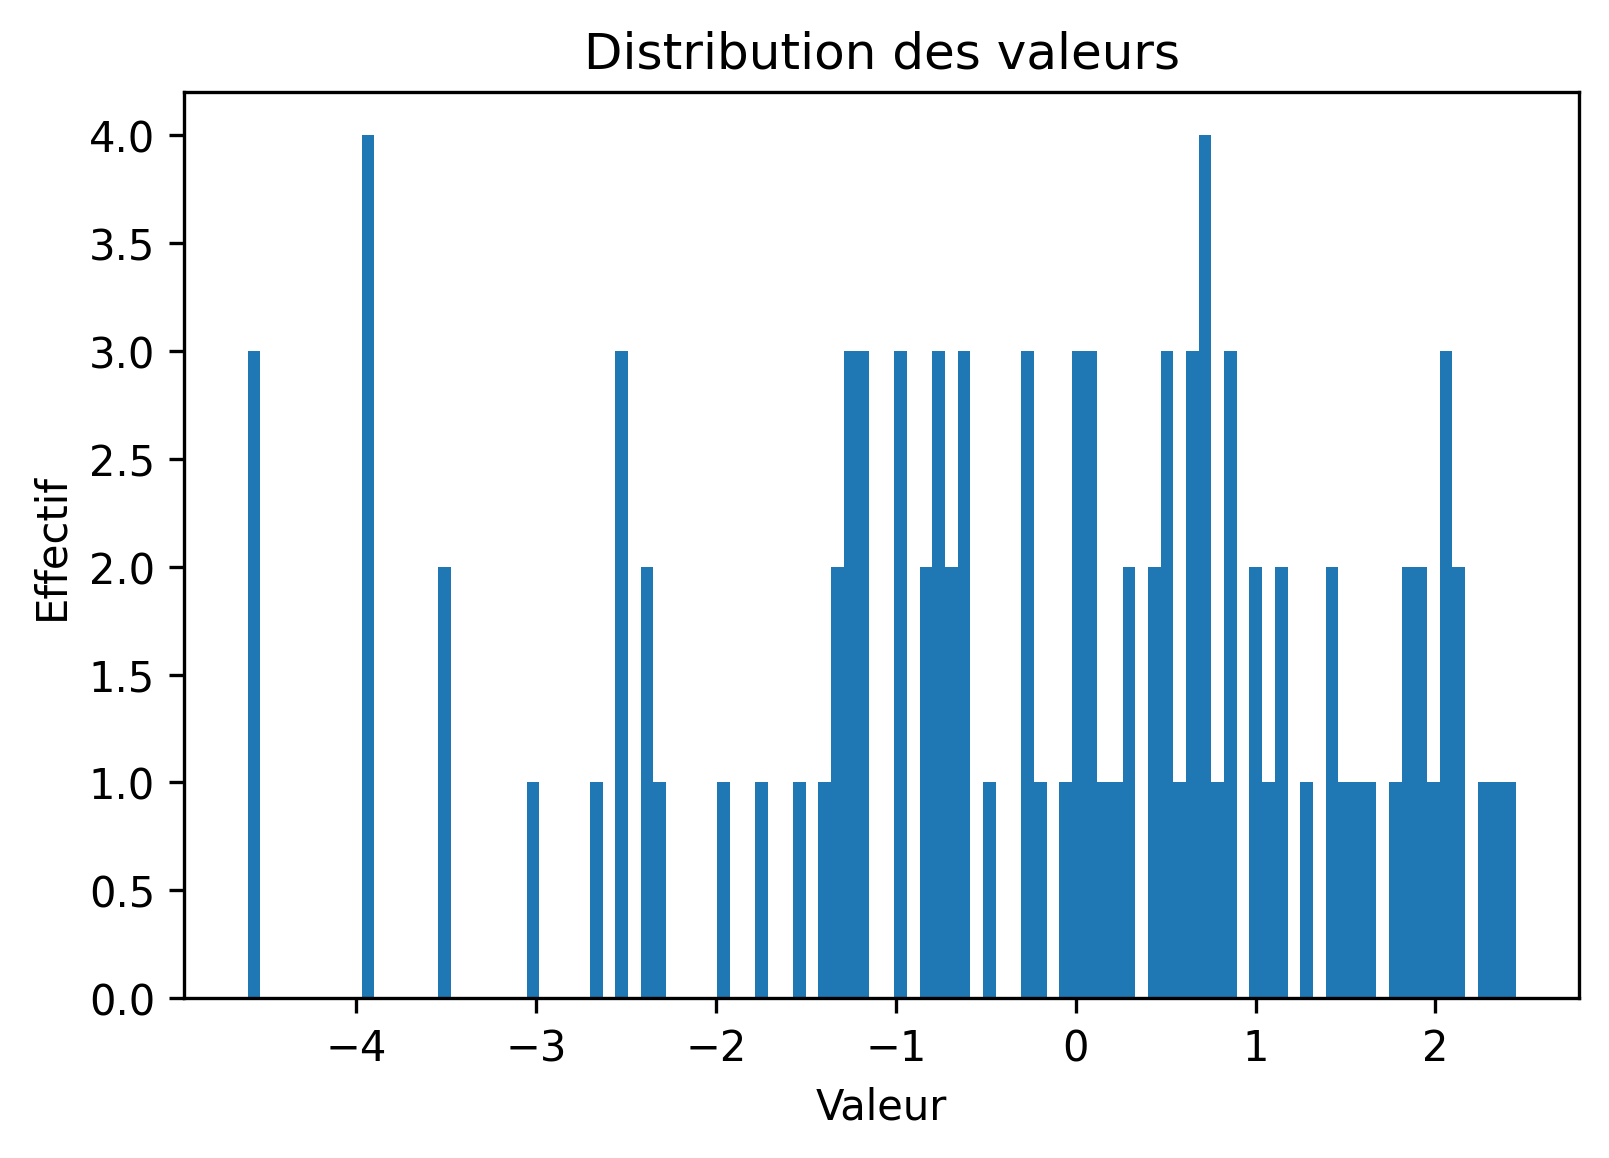

In [81]:
plt.figure()
plt.hist(transf_log(data), 100)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

On observe un changement radical du point de vue que l'on a des données. Elles sont notament plus régulières.

    5.2 Transformation en rangs

In [82]:
def to_ranks(data:list)->list:
    sorted_data=sorted(data)
    res=[]
    for elt in data:
        i=sorted_data.index(elt)
        if i not in res:
            res.append(i)
        else:
            while i in res:
                i+=1
    return res

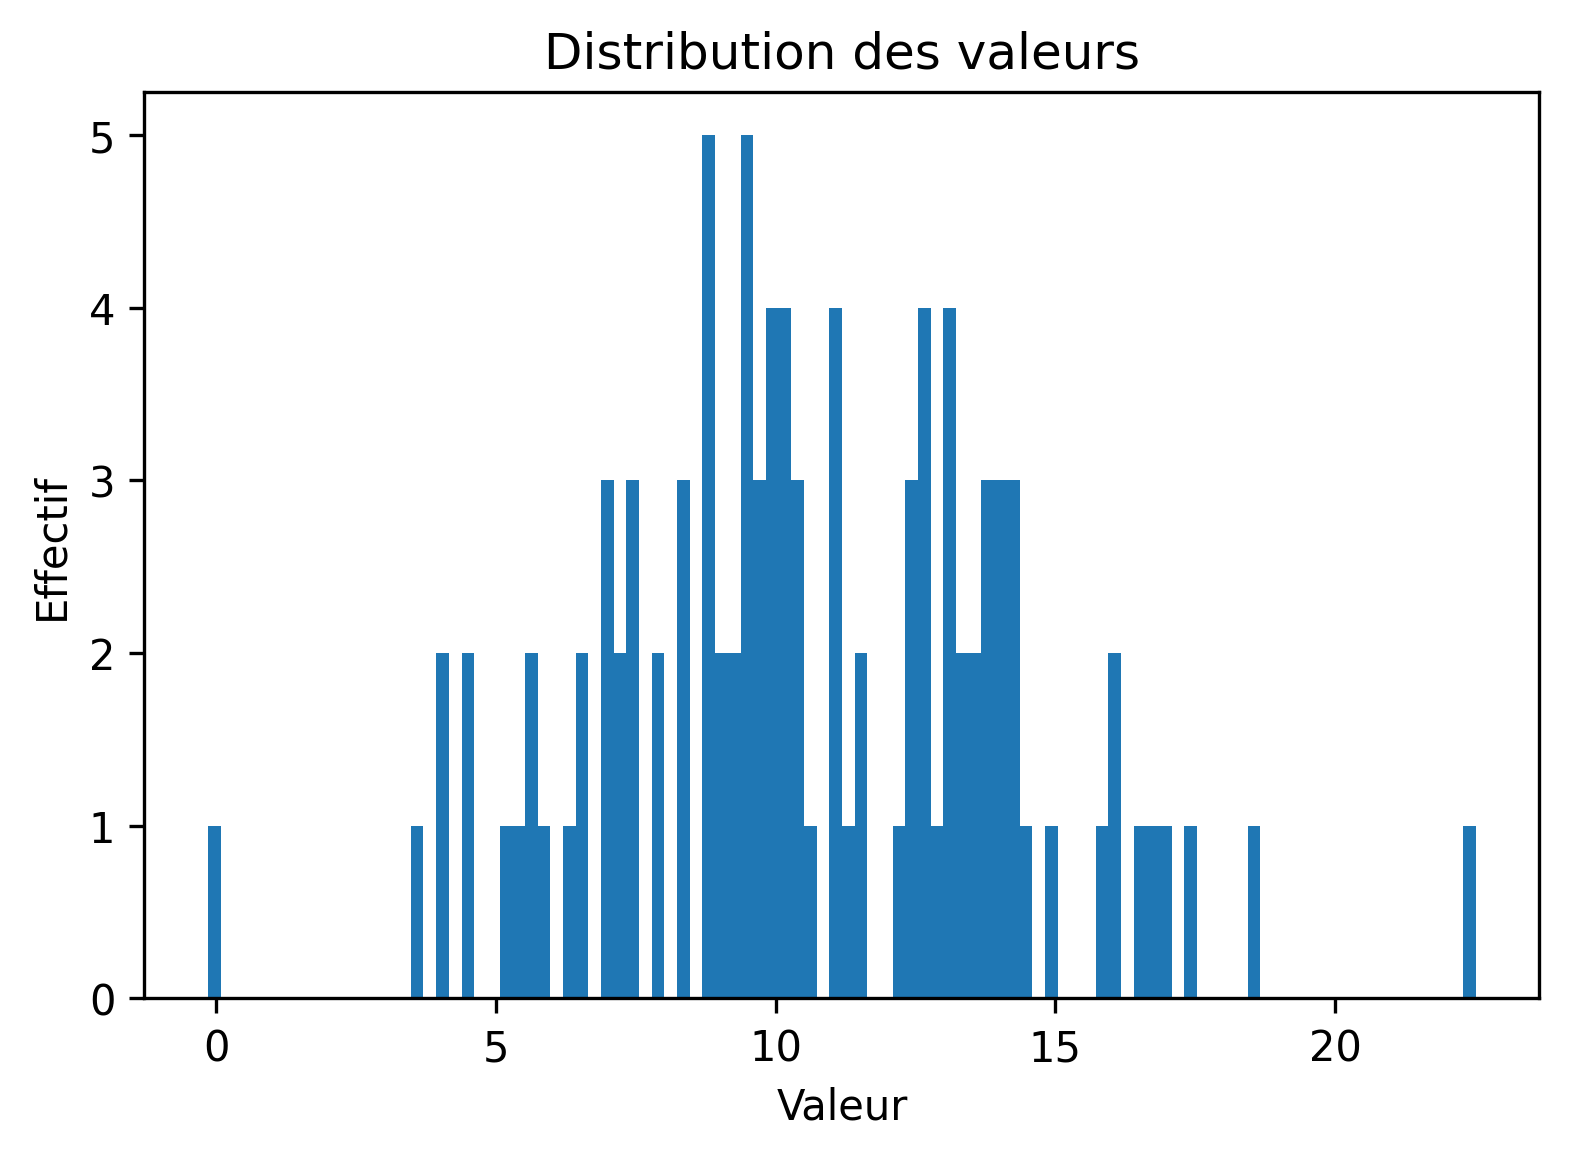

In [84]:
data = [9.4531, 11.6358, 11.0114, 13.6833, 22.5199, 6.9069, 9.6858, 10.1612, 9.6639, 13.7164, 
        -0.1524, 9.3856, 5.6784, 12.4886, 4.4473, 9.5456, 10.3225, 13.1786, 13.4331, 5.8983, 
        9.9682, 9.1689, 8.3763, 8.3065, 11.2544, 3.9533, 13.1199, 9.8712, 9.3393, 10.1274, 
        8.3552, 14.1878, 4.4704, 6.5326, 14.853, 12.9896, 16.5132, 6.4729, 14.0004, 16.0347, 
        7.4854, 10.9724, 8.6938, 14.3512, 13.6721, 12.412, 16.6542, 7.3041, 17.4611, 10.977, 
        7.8374, 13.8277, 4.136, 5.4403, 11.4788, 10.3844, 14.0403, 5.1948, 3.6954, 8.7836, 
        7.0702, 9.4915, 13.9402, 9.4944, 12.3044, 12.7221, 14.4586, 11.0558, 12.657, 13.5342, 
        14.2622, 8.9576, 12.7594, 16.9846, 18.5019, 6.4132, 7.3614, 13.0121, 10.0488, 5.572, 
        8.7635, 7.2641, 12.6194, 16.1174, 6.9511, 9.6203, 12.4084, 10.3873, 10.1446, 13.3794, 
        9.9577, 10.2323, 7.4461, 8.7361, 15.8436, 9.0257, 13.1165, 10.529, 7.8485, 8.843]
plt.figure()
plt.hist(data, 100)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

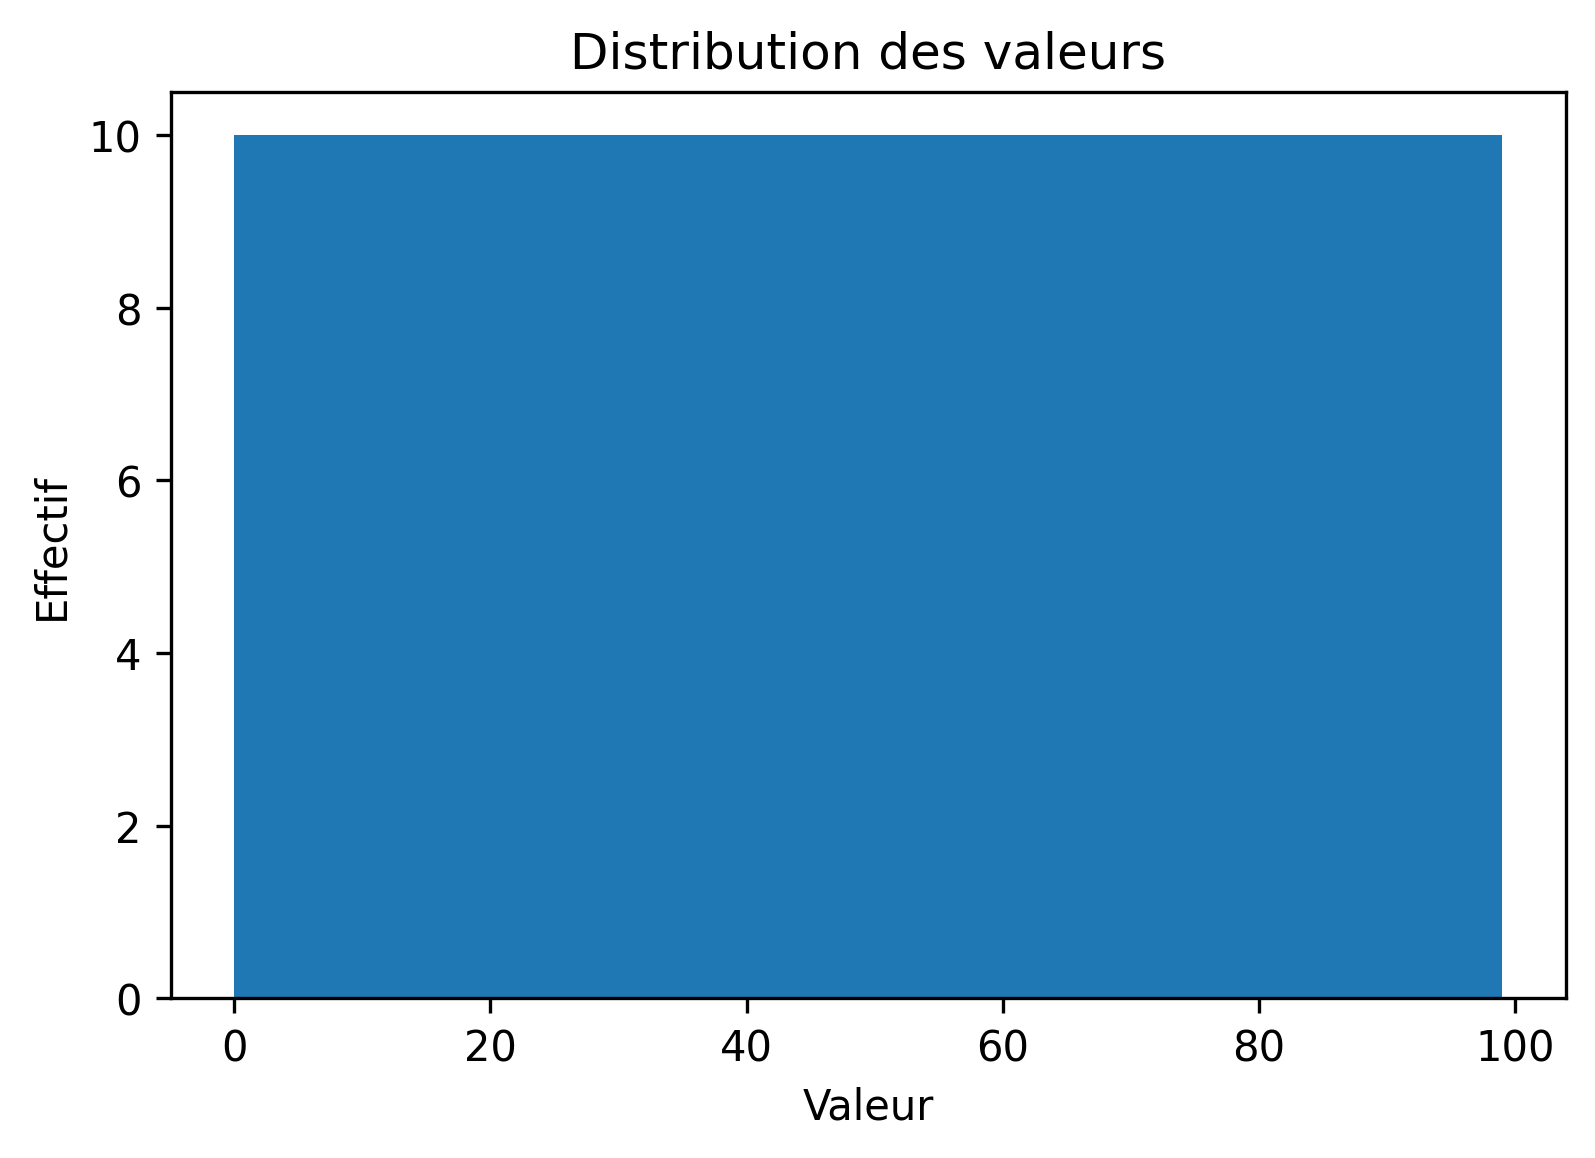

In [86]:
plt.figure()
plt.hist(to_ranks(data), 10)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

On observe qu'il n'y a aucun intérêt à étudier les rangs de façon visuelle étant donné que toutes les valeurs sont réparties équitablement.

In [88]:
import scipy.stats as sp
import random
import time

def compare(f1, f2, size, rep):
    s_dtf1 = [0.0] * rep
    s_dtf2 = [0.0] * rep
    for i in range(rep) :
        data = [random.random()] * size
        t1 = time.time()
        data2 = f1(data)
        t2 = time.time()
        s_dtf1[i] = t2 - t1
        t1 = time.time()
        data2 = f2(data)
        t2 = time.time()
        s_dtf2[i] = t2 - t1
    print(f"Première fonction : \n temps moyen : {mean(s_dtf1)} (écart-type : {stdev(s_dtf1)}")
    print(f"Deuxième fonction : \n temps moyen : {mean(s_dtf2)} (écart-type : {stdev(s_dtf2)}")
    return None

compare(to_ranks, sp.rankdata, 100000, 100)

Première fonction : 
 temps moyen : 0.013124001026153565 (écart-type : 0.00022455442038448551
Deuxième fonction : 
 temps moyen : 0.00928415298461914 (écart-type : 0.00040416535300131595


    5.3 Centrage et réduction

In [89]:
data = [6.6, 8.9, 11.6, 5.5, 7.8, 13.3, 14.7, 6.8, 8.8, 19.5, 
        14.1, 9.7, 10.4, 11.0, 15.2, 16.4, 15.4, 13.3, 9.2, 10.7, 
        9.4, 11.8, 13.2, 15.9, 12.3, 15.6, 12.0, 5.7, 18.7, 15.6, 
        13.7, 16.2, 6.9, 13.4, 15.3, 21.0, 11.5, 17.8, 13.5, 15.5, 
        10.8, 18.0, 0.0, 9.4, 12.7, 12.4, 16.0, 4.2, 16.2, 3.5, 
        9.8, 11.6, 15.3, 8.9, 9.5, 16.8, 10.8, 15.2, 11.0, 11.3, 
        11.5, 13.7, 11.1, 19.3, 20.9, 7.9, 9.7, 11.4, 9.8, 18.7, 
        14.3, 17.3, 9.9, 16.6, 11.2, 19.0, 13.7, 13.8, 17.9, 9.6, 
        16.7, 19.7, 10.1, 9.4, 13.9, 5.0, 16.1, 10.9, 9.9, 14.0, 
        5.0, 7.9, 25.6, 11.6, 15.2, 15.7, 11.4, 5.8, 16.0, 14.2]
moy=mean(data)
e_t=stdev(data)
print(f"Moyenne : {moy},  Ecart-Type : {e_t}.")

Moyenne : 12.587,  Ecart-Type : 4.2989453357771374.


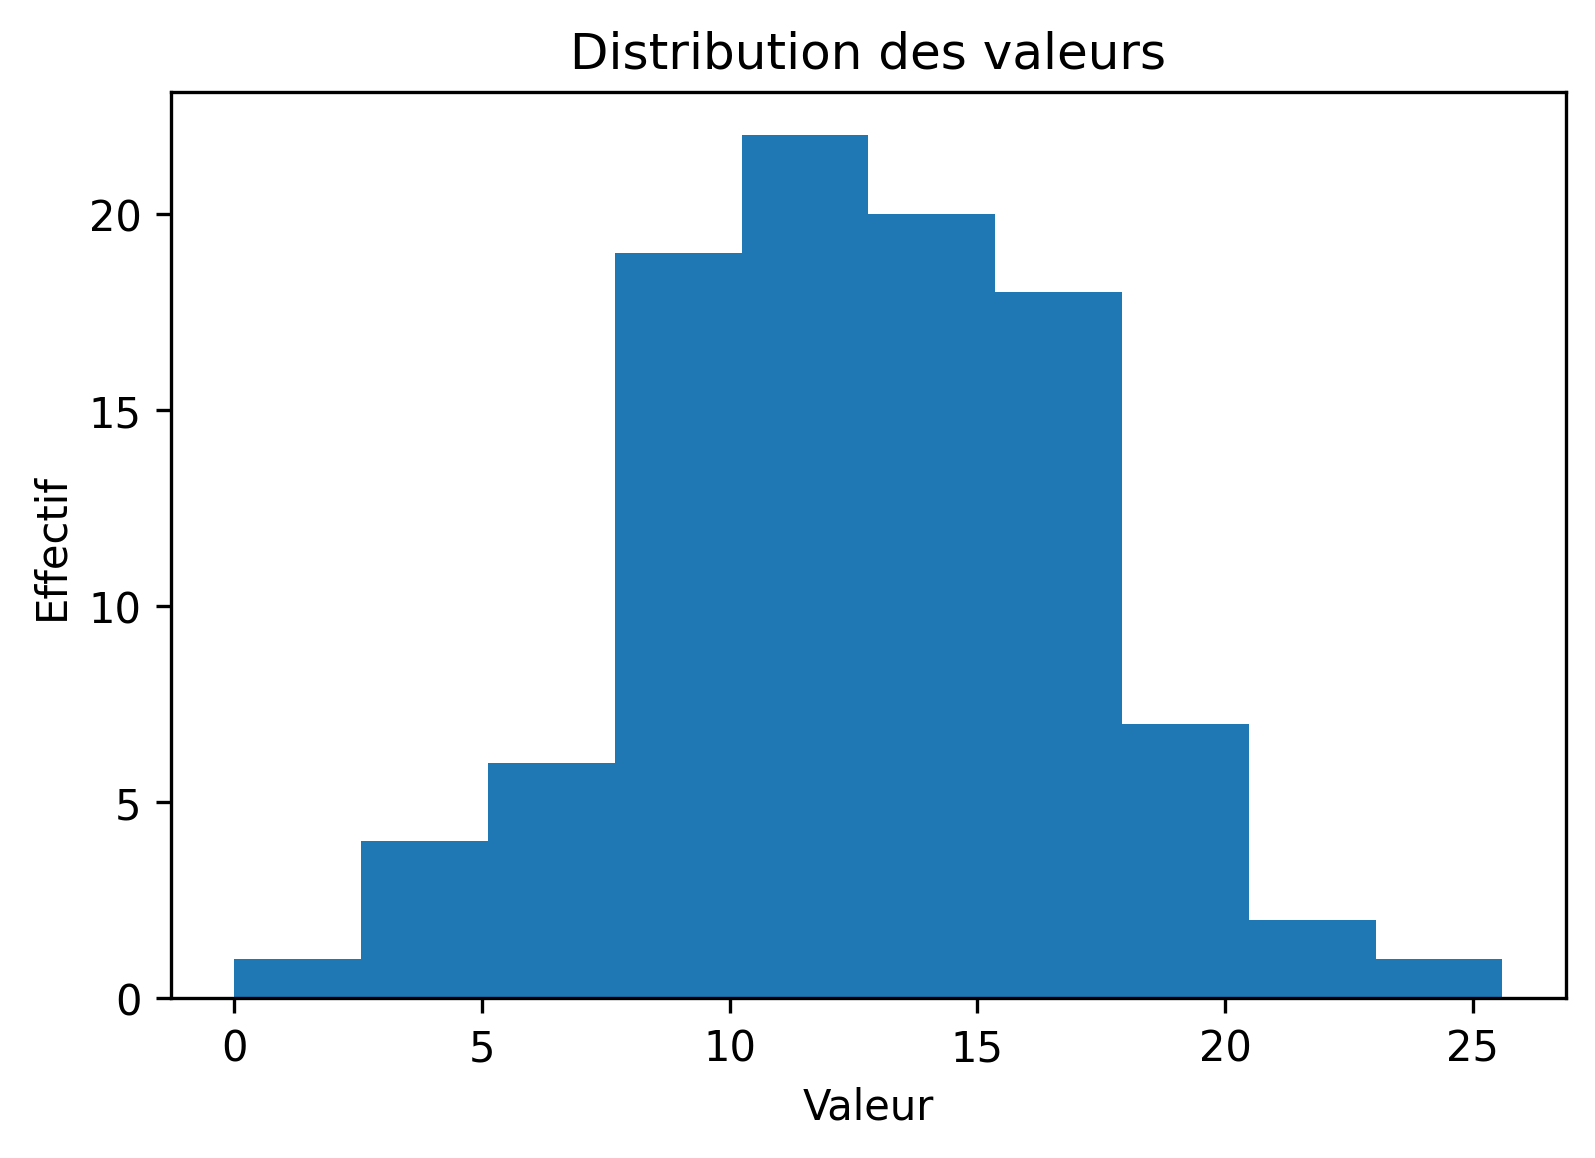

In [101]:
plt.figure()
plt.hist(data, 10)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

In [92]:
def scale(data,center,scale):
    moy=mean(data)
    e_t=stdev(data)
    if center:
        res=[]
        for elt in data:
            res.append(elt-moy)
        data=res
    if scale:
        print(i)
        res=[]
        for elt in data:
            res.append(elt/e_t)
        data=res
    return data

In [96]:
endData=scale(data,True,True)
print(stdev(endData))

0.9999999999999996


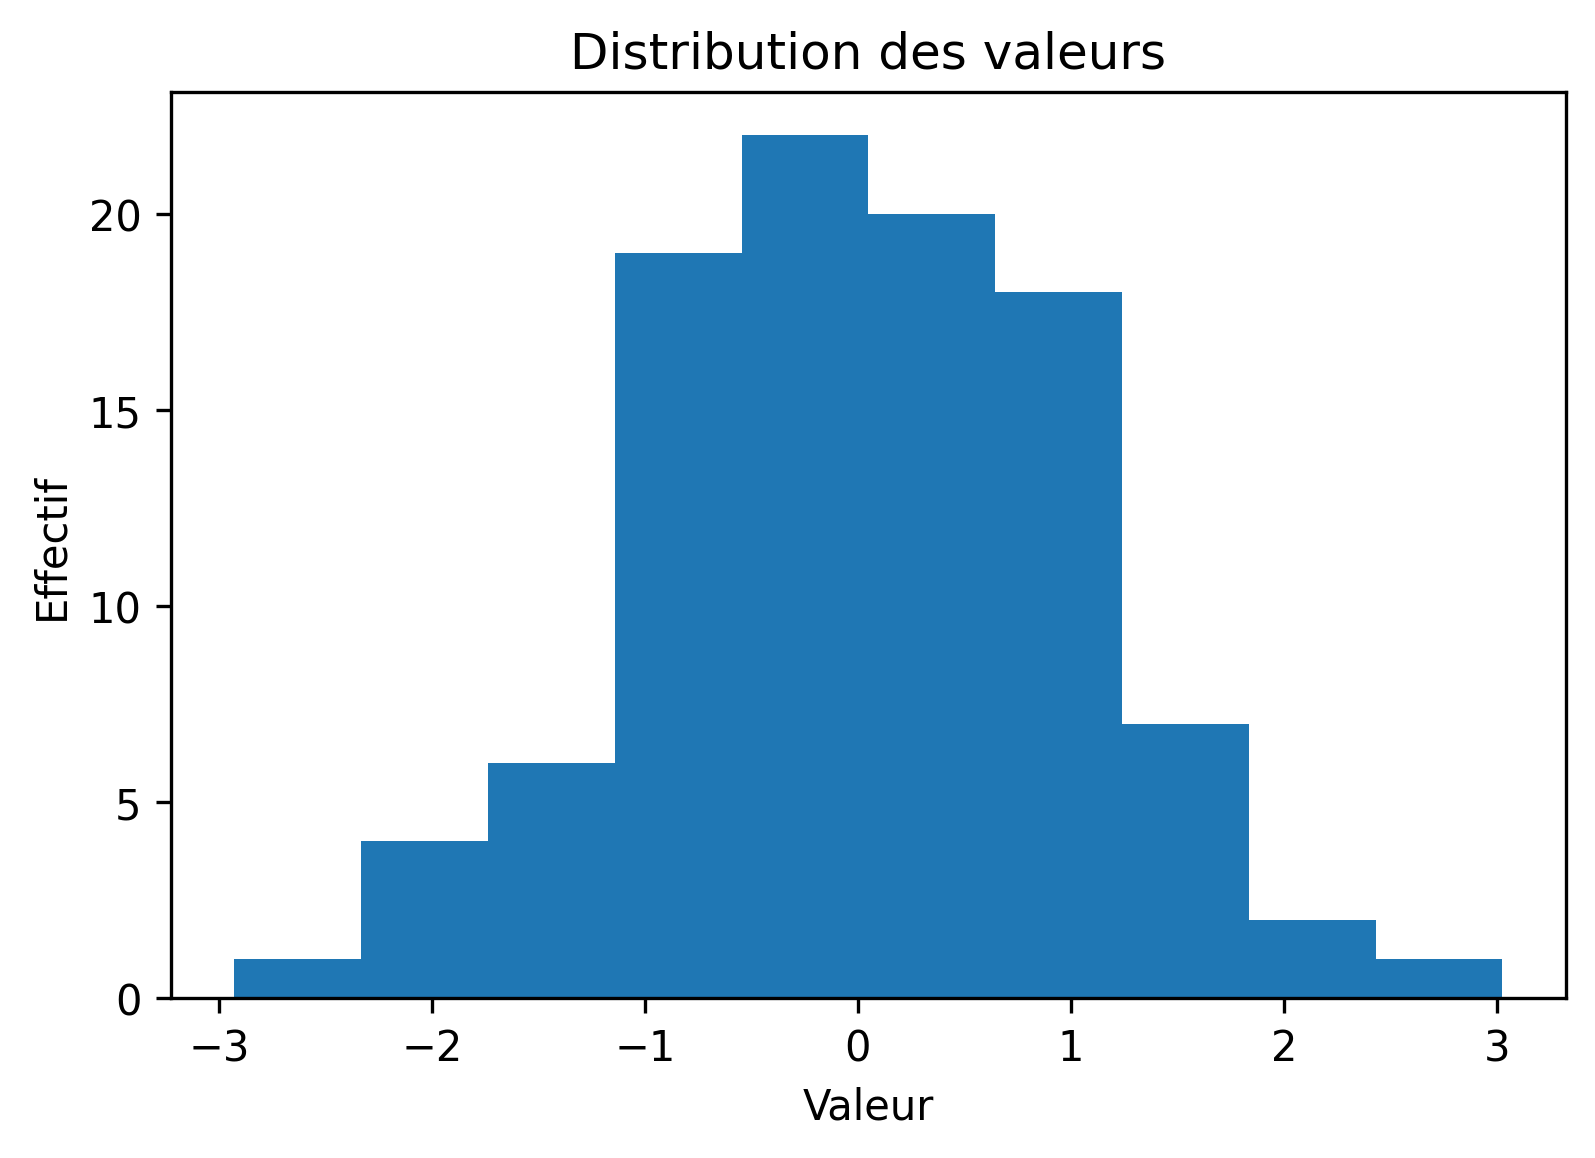

In [102]:
plt.figure()
plt.hist(endData, 10)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()